---
# Homework 1:

In [1]:
# import numpy for calculating stuff
import numpy as np
import pandas as pd
import os 

# For storing objects
import pickle

# You can use a another tool from deepdish to do the same thing:
# http://deepdish.io/ , comment out next line for using deepdish
import deepdish as dd

# Astronomical packages
import astropy

# importing skit-learn library
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# import matplotlib.pyplot for plotting stuff
import matplotlib.pyplot as plt

# font parameters dictionary
font = {'family' : 'serif',
        'weight' : 'bold',
}
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)

# Set the font parameters
plt.rc('font', **font) 


# Formating a number into scientific notation
def format_e(n):
    a = '{:.2E}'.format(n)
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]

# Problem 1: 

### 0.4 point

## Part 1:

In [2]:
def Fib_rec(n=0):
    if  n == 0:
        return  1
    elif  n == 1:
        return 1
    else:
        return Fib_rec(n - 1) + Fib_rec(n - 2)

In [3]:
[Fib_rec(i) for i in range(15)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]

In [4]:
def Fib_loop(n=0):
    if n == 0 or n == 1:
        an = 1
    else:
        a0, a1 = 1, 1
        for i in range(1, n):
            an = a0 + a1
            a0 = a1
            a1 = an 
    return an

In [5]:
[Fib_loop(i) for i in range(15)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]

## Part 2:

The number of function calls can grow much larger when using recursion.

## Part 3:


In [6]:
import time 

In [7]:
def timer(n, k, f=Fib_rec):
    ti = time.time()
    _ = [f(n) for _ in range(k)]
    tf = time.time()
    return (tf - ti) / k

In [8]:
timer(10, 50, Fib_rec), timer(10, 50, Fib_loop)

(1.926422119140625e-05, 9.72747802734375e-07)

## Part 4:


In [9]:
k = 20
t = []
for n in range(25):
    t_rec = timer(n, k=k, f=Fib_rec)
    t_loop = timer(n, k=k, f=Fib_loop) 
    t += [[n, t_rec, t_loop]]

In [10]:
t = np.array(t)

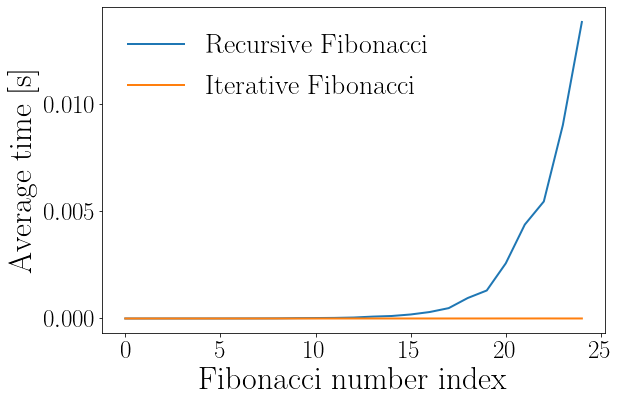

In [11]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t[:, 0], t[:, 1], label=r"Recursive Fibonacci", lw=2)
ax.plot(t[:, 0], t[:, 2], label=r"Iterative Fibonacci", lw=2)


plt.tick_params(labelsize=25)

plt.xlabel(r"Fibonacci number index", fontsize=32)
plt.ylabel(r"Average time [s]", fontsize=32)


ax.legend(frameon=False, fontsize=28)
plt.show()

---
# Problem 2:

### 0.4 point

\begin{equation*}
   M = \begin{pmatrix} 
1 & -4 & 2 \\
-4 & 1 & -2 \\
2 & -2 & -2 
\end{pmatrix}
\end{equation*}

## Part 1:


$$\det(M) = 54$$

\begin{equation*}
   M^T = \begin{pmatrix} 
1 & -4 & 2 \\
-4 & 1 & -2 \\
2 & -2 & -2 
\end{pmatrix} = M
\end{equation*}


\begin{equation*}
   M^{-1} = \frac{1}{54} \begin{pmatrix} 
 -6 & -12 &  6\\
 -12& -6 & -6 \\
 6 & -6 & -15 
\end{pmatrix} 
\end{equation*}




## Part 2:


Eigenvalues from $\det(M - \lambda I) = 0$ are:
$$\lambda = -3, -3, 6$$


\begin{equation*}
\lambda = 6 \to 
   \vec{v} = \begin{pmatrix} 
 2 \\
 -2\\
 1 
\end{pmatrix} 
\end{equation*}

Since $\lambda=-3$ is degenerate we have a eigenspace (eigenplane), also there is not uniqes solution for these vector and any two linearly independent vectors in this space is another solution:
\begin{equation*}
\lambda = -3 \to 
   \text{Span}\{
   \begin{pmatrix} 
 1 \\
 1\\
 0 
\end{pmatrix},
\begin{pmatrix} 
 -\frac{1}{2}\\
 0\\
 1 
\end{pmatrix} \}
\end{equation*}



## Part 3:

\begin{equation*}
	A=\begin{pmatrix} 
	x_{11} & x_{12} & x_{13} \\
	x_{21} & x_{22} & x_{23} \\
	x_{31} & x_{32} & x_{33} 
	\end{pmatrix}
  \end{equation*}
  \begin{equation*}
   f(A)= x_{11}^2 x_{22} x_{23} + x_{11}x_{12}x_{13}x_{31}-x_{33}^2 x_{32} x_{21}
   \end{equation*}

$\nabla_A f(A) = ?$

\begin{equation*}
A=\begin{pmatrix} 
\frac{\partial f}{\partial x_{11}} &  \frac{\partial f}{\partial x_{12}} & \frac{\partial f}{\partial x_{13}}  \\
\frac{\partial f}{\partial x_{21}} & \frac{\partial f}{\partial x_{22}} & \frac{\partial f}{\partial x_{23}} \\
\frac{\partial f}{\partial x_{31}} & \frac{\partial f}{\partial x_{32}} & \frac{\partial f}{\partial x_{33}} \\
\end{pmatrix} =  
\begin{pmatrix}
2x_{11}x_{22}x_{23} + x_{12}x_{13}x_{31} & x_{11} x_{13} x_{31} & x_{11}x_{12}x_{31} \\
-x_{33}^2 x_{32} & x_{11}^2x_{23} & x_{11}^2x_{22} \\
x_{11}x_{12}x_{13} & -x_{33}^2 x_{21} & -2 x_{33} x_{32} x_{21} \\
\end{pmatrix}
  \end{equation*}

## Part 4:

\begin{equation*}
H(g)=\begin{pmatrix} 
\frac{\partial^2 g}{\partial x^2} & \frac{\partial^2 g}{\partial x \partial y} & \frac{\partial^2 g}{\partial x \partial z} \\
\frac{\partial^2 g}{\partial y \partial x} & \frac{\partial^2 g}{\partial y^2} & \frac{\partial^2 g}{\partial y \partial z} \\
\frac{\partial^2 g}{\partial z \partial x} & \frac{\partial^2 g}{\partial z \partial y} & \frac{\partial^2 g}{\partial z^2} \\
\end{pmatrix} = \begin{pmatrix} 
6xy - yz\sin{x} & 3x^2 + z\cos{x} + 2y z^5 & y \cos{x} +5y^2 z^4\\
3x^2 + z\cos{x} + 2y z^5 & 2xz^5 & \sin{x} + 10xyz^4 \\
y \cos{x} +5y^2 z^4 & \sin{x} + 10xyz^4  & 20xy^2 z^3\\
\end{pmatrix} 
 \end{equation*}


----

# Problem 3:

### 0.2 point

---